In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

    #pandas의 read_csv함수를 이용하여 dtm파일을 불러온다.
file=open("C:/Users/myuni/Desktop/blog_crawling.csv",'r')
lists=file.readlines()
file.close()
lists

['title,content\n',
 "미국 여행지추천 :: 샌프란시스코 명소 추천!,첫 여행지여서 더 인상 깊었던 4박 5일 간의 샌프란시스코 여정 중 추천해드릴만한... 요 경로로 달렸답니당 슝슝 특히 미국에 간 지 얼마 안되어서 '크 여기가...\n",
 '"미국여행지 추천 밀워키 여행코스 (미술관, 퍼블릭마켓, 퍼플도어, 할리데이비슨, 밀러맥주 박물관)","박물관) 미국여행지 추천 위스콘신 밀워키 여행코스 2020 뜨고 있는 여행지! 안녕하세요, 브로디입니다. 연말이 다가올수록 어렸을 때 봤던 영화 속 미국, 유럽의..."\n',
 '미국 포켓와이파이 대여ㅣ미국여행지 추천 & 중국인 입국금지,"안녕 핀아의 Bliss of Travel입니다:-)드디어 일 년 내에 미국 3대 섬 휴양지 사이판, 하와... blog.naver.com 03. 뉴욕 NEW YORK 미국 여행지 추천 - 뉴욕 01. 뉴욕의 장점 & 추천하는..."\n',
 '미국 여행지 추천- LA(1),오늘은 미국 여행지중 서부로 떠나볼게요 역시 겨울엔 따수운곳으로 가는게... 오늘 추천드리는 여행지 순서는 실제로 제가 직접 이 순서대로 우버를 타고 다녔던...\n',
 '미국 여행지 추천 힐턴 헤드 아일랜드,국내 여행지 물가가 비싼 이유가 해외로 발길을 돌리는 사람들이 많아지는 적잖은... 선택한 미국 여행지 추천한 곳 미국 동남부에 위치한 사우스캐롤라이나 힐턴 헤드...\n',
 '미국 자동차 여행지 추천 :: 미서부 국립공원&드라이브 코스,자동차 여행지를 추천드리겠습니당! 미서부 자동차 여행지 추천 START-! 요세미티 국립공원 미국의 대표적인 국립공원인 요세미티 국립공원을 추천해요! 요세미티는...\n',
 '"[미국]  미국 소개, 여행지 추천 및 미국 이스타(ESTA) 비자 신청방법",비자 가격은 14$ 미국 여행지를 추천한다면? 내가 가본 곳 중에 <Best 10> <앤털로프캐년> 미국 애리조나 주에 있는 앤털로프캐니언 <Antelope Canyon> 붉은색을...\n',
 '미

In [2]:
twitter=Twitter()
word=[]

for sentence in lists:
    word.append(twitter.pos(sentence))
    
print(word)

C:\Users\myuni\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('title', 'Alpha'), (',', 'Punctuation'), ('content', 'Alpha'), ('\n', 'Foreign')], [('미국', 'Noun'), ('여행지', 'Noun'), ('추천', 'Noun'), ('::', 'Punctuation'), ('샌프란시스코', 'Noun'), ('명소', 'Noun'), ('추천', 'Noun'), ('!,', 'Punctuation'), ('첫', 'Noun'), ('여행지', 'Noun'), ('여서', 'Josa'), ('더', 'Noun'), ('인상', 'Noun'), ('깊었던', 'Adjective'), ('4', 'Number'), ('박', 'Noun'), ('5일', 'Number'), ('간의', 'Noun'), ('샌프란시스코', 'Noun'), ('여정', 'Noun'), ('중', 'Noun'), ('추천', 'Noun'), ('해드릴만', 'Verb'), ('한', 'Determiner'), ('...', 'Punctuation'), ('요', 'Noun'), ('경로', 'Noun'), ('로', 'Josa'), ('달렸답니당', 'Verb'), ('슝슝', 'Noun'), ('특히', 'Adverb'), ('미국', 'Noun'), ('에', 'Josa'), ('간', 'Noun'), ('지', 'Verb'), ('얼마', 'Noun'), ('안되어서', 'Adjective'), ("'", 'Punctuation'), ('크', 'Verb'), ('여기', 'Noun'), ('가', 'Josa'), ('...', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('미국여행', 'Noun'), ('지', 'Josa'), ('추천', 'Noun'), ('밀워키', 'Noun'), ('여행', 'Noun'), ('코스', 'Noun'), ('(', 'Punctuation'), ('미술관', 'Noun')

In [3]:
noun_list=[]

for sentence in word:
    for w,t in sentence:
        if t in ["Noun"]:
            noun_list.append(w)
            
print(noun_list)

['미국', '여행지', '추천', '샌프란시스코', '명소', '추천', '첫', '여행지', '더', '인상', '박', '간의', '샌프란시스코', '여정', '중', '추천', '요', '경로', '슝슝', '미국', '간', '얼마', '여기', '미국여행', '추천', '밀워키', '여행', '코스', '미술관', '퍼블릭', '마켓', '퍼플', '도어', '할리데이비슨', '밀러', '맥주', '박물관', '박물관', '미국여행', '추천', '위스콘신', '밀워키', '여행', '코스', '여행지', '브로디', '연말', '때', '영화', '속', '미국', '유럽', '미국', '포켓', '와이파이', '대여', '미국여행', '추천', '중국인', '입국', '금지', '안녕', '일', '년', '내', '미국', '섬', '휴양지', '사이판', '하와', '뉴욕', '미국', '여행지', '추천', '뉴욕', '뉴욕', '장점', '추천', '미국', '여행지', '추천', '오늘', '미국', '여행지', '서부', '역시', '겨울', '곳', '오늘', '추천', '여행지', '순서', '실제', '제', '직접', '이', '순서대로', '우버', '타고', '미국', '여행지', '추천', '힐턴', '헤드', '아일랜드', '국내', '여행지', '물가', '이유', '해외', '발길', '사람', '선택', '미국', '여행지', '추천', '곳', '미국', '남부', '위치', '사우스캐롤라이나', '힐턴', '헤드', '미국', '자동차', '여행지', '추천', '서부', '국립공원', '드라이브', '코스', '자동차', '여행지', '추천', '습', '서부', '자동차', '여행지', '추천', '미티', '국립공원', '미국', '대표', '국립공원', '미티', '국립공원', '추천', '미티', '미국', '미국', '소개', '여행지', '추천', '및', '미국', '스타', '비자', '신청', 

In [4]:
for w in noun_list:
    if w == "미국":
        noun_list.remove(w)



print(noun_list)

['여행지', '추천', '샌프란시스코', '명소', '추천', '첫', '여행지', '더', '인상', '박', '간의', '샌프란시스코', '여정', '중', '추천', '요', '경로', '슝슝', '간', '얼마', '여기', '미국여행', '추천', '밀워키', '여행', '코스', '미술관', '퍼블릭', '마켓', '퍼플', '도어', '할리데이비슨', '밀러', '맥주', '박물관', '박물관', '미국여행', '추천', '위스콘신', '밀워키', '여행', '코스', '여행지', '브로디', '연말', '때', '영화', '속', '유럽', '포켓', '와이파이', '대여', '미국여행', '추천', '중국인', '입국', '금지', '안녕', '일', '년', '내', '섬', '휴양지', '사이판', '하와', '뉴욕', '여행지', '추천', '뉴욕', '뉴욕', '장점', '추천', '여행지', '추천', '오늘', '여행지', '서부', '역시', '겨울', '곳', '오늘', '추천', '여행지', '순서', '실제', '제', '직접', '이', '순서대로', '우버', '타고', '여행지', '추천', '힐턴', '헤드', '아일랜드', '국내', '여행지', '물가', '이유', '해외', '발길', '사람', '선택', '여행지', '추천', '곳', '남부', '위치', '사우스캐롤라이나', '힐턴', '헤드', '자동차', '여행지', '추천', '서부', '국립공원', '드라이브', '코스', '자동차', '여행지', '추천', '습', '서부', '자동차', '여행지', '추천', '미티', '국립공원', '대표', '국립공원', '미티', '국립공원', '추천', '미티', '소개', '여행지', '추천', '및', '스타', '비자', '신청', '방법', '비자', '가격', '여행지', '추천', '내', '곳', '중', '앤털', '로프', '캐년', '애리조나', '주', '앤털', '로프', '은색', '

In [5]:
count=Counter(noun_list)
word_count=dict(count.most_common())
word_count


{'추천': 270,
 '여행지': 170,
 '미국여행': 90,
 '국립공원': 60,
 '오늘': 50,
 '미티': 50,
 '로프': 40,
 '여기': 30,
 '여행': 30,
 '코스': 30,
 '뉴욕': 30,
 '서부': 30,
 '곳': 30,
 '자동차': 30,
 '캐년': 30,
 '샌프란시스코': 20,
 '중': 20,
 '밀워키': 20,
 '박물관': 20,
 '내': 20,
 '제': 20,
 '힐턴': 20,
 '헤드': 20,
 '비자': 20,
 '앤털': 20,
 '엔텔': 20,
 '그랜드캐년': 20,
 '것': 20,
 '미국': 20,
 '명소': 10,
 '첫': 10,
 '더': 10,
 '인상': 10,
 '박': 10,
 '간의': 10,
 '여정': 10,
 '요': 10,
 '경로': 10,
 '슝슝': 10,
 '간': 10,
 '얼마': 10,
 '미술관': 10,
 '퍼블릭': 10,
 '마켓': 10,
 '퍼플': 10,
 '도어': 10,
 '할리데이비슨': 10,
 '밀러': 10,
 '맥주': 10,
 '위스콘신': 10,
 '브로디': 10,
 '연말': 10,
 '때': 10,
 '영화': 10,
 '속': 10,
 '유럽': 10,
 '포켓': 10,
 '와이파이': 10,
 '대여': 10,
 '중국인': 10,
 '입국': 10,
 '금지': 10,
 '안녕': 10,
 '일': 10,
 '년': 10,
 '섬': 10,
 '휴양지': 10,
 '사이판': 10,
 '하와': 10,
 '장점': 10,
 '역시': 10,
 '겨울': 10,
 '순서': 10,
 '실제': 10,
 '직접': 10,
 '이': 10,
 '순서대로': 10,
 '우버': 10,
 '타고': 10,
 '아일랜드': 10,
 '국내': 10,
 '물가': 10,
 '이유': 10,
 '해외': 10,
 '발길': 10,
 '사람': 10,
 '선택': 10,
 '남부': 10,
 '위치': 10,
 '

In [6]:
if '추천' in word_count: 
    del word_count['추천']
    
if '여행지' in word_count: 
    del word_count['여행지']
        
if '여기' in word_count: 
    del word_count['여기']
        
if '미국' in word_count: 
    del word_count['미국']
    
if '오늘' in word_count: 
    del word_count['오늘']
        
if '여행' in word_count: 
    del word_count['여행']
        
if '미국여행' in word_count: 
    del word_count['미국여행']
    
word_count

{'국립공원': 60,
 '미티': 50,
 '로프': 40,
 '코스': 30,
 '뉴욕': 30,
 '서부': 30,
 '곳': 30,
 '자동차': 30,
 '캐년': 30,
 '샌프란시스코': 20,
 '중': 20,
 '밀워키': 20,
 '박물관': 20,
 '내': 20,
 '제': 20,
 '힐턴': 20,
 '헤드': 20,
 '비자': 20,
 '앤털': 20,
 '엔텔': 20,
 '그랜드캐년': 20,
 '것': 20,
 '명소': 10,
 '첫': 10,
 '더': 10,
 '인상': 10,
 '박': 10,
 '간의': 10,
 '여정': 10,
 '요': 10,
 '경로': 10,
 '슝슝': 10,
 '간': 10,
 '얼마': 10,
 '미술관': 10,
 '퍼블릭': 10,
 '마켓': 10,
 '퍼플': 10,
 '도어': 10,
 '할리데이비슨': 10,
 '밀러': 10,
 '맥주': 10,
 '위스콘신': 10,
 '브로디': 10,
 '연말': 10,
 '때': 10,
 '영화': 10,
 '속': 10,
 '유럽': 10,
 '포켓': 10,
 '와이파이': 10,
 '대여': 10,
 '중국인': 10,
 '입국': 10,
 '금지': 10,
 '안녕': 10,
 '일': 10,
 '년': 10,
 '섬': 10,
 '휴양지': 10,
 '사이판': 10,
 '하와': 10,
 '장점': 10,
 '역시': 10,
 '겨울': 10,
 '순서': 10,
 '실제': 10,
 '직접': 10,
 '이': 10,
 '순서대로': 10,
 '우버': 10,
 '타고': 10,
 '아일랜드': 10,
 '국내': 10,
 '물가': 10,
 '이유': 10,
 '해외': 10,
 '발길': 10,
 '사람': 10,
 '선택': 10,
 '남부': 10,
 '위치': 10,
 '사우스캐롤라이나': 10,
 '드라이브': 10,
 '습': 10,
 '대표': 10,
 '소개': 10,
 '및': 10,
 '스타': 10,
 

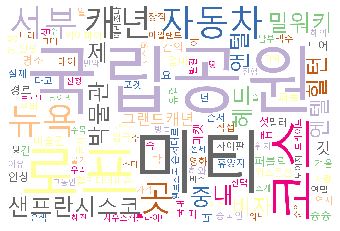

In [7]:
wordcloud=WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(word_count)
                    
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
